In [1]:
!pip install bybit-backtest

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 1.9 MB/s eta 0:00:0000:0100:010m
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 2.0 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 157.4/157.4 kB 736.3 kB/s eta 0:00:0000:0100:01


In [2]:
from bybit_backtest import Backtest

class MyBacktest(Backtest):
   def strategy(self):
       fast_ma = self.sma(period=5)
       slow_ma = self.sma(period=25)
       # golden cross
       self.sell_exit = self.buy_entry = (fast_ma > slow_ma) & (
           fast_ma.shift() <= slow_ma.shift()
       )
       # dead cross
       self.buy_exit = self.sell_entry = (fast_ma < slow_ma) & (
           fast_ma.shift() >= slow_ma.shift()
       )

In [22]:
class macd(Backtest):
   def strategy(self):
    macd, signal = self.macd(fast_period=12,slow_period=26,signal_period=9)
    # golden cross
    self.sell_exit = self.buy_entry = (macd > signal) & (macd.shift() <= signal.shift())
    # dead cross
    self.buy_exit = self.sell_entry = (macd < signal) & (macd.shift() >= signal.shift())
    self.qty = 0.1 # order quantity (default=0.001)
    self.stop_loss = 50 # stop loss (default=0 stop loss none)
    self.take_profit = 100 # take profit (default=0 take profit none)

In [13]:
class macdrsi(Backtest):
   def strategy(self):
    fast_ma = self.sma(period=8)
    slow_ma = self.sma(period=17)
    rsi = self.rsi(period=10)
    macd, signal = self.macd(fast_period=8,slow_period=17,signal_period=9)
    # golden cross
    self.sell_exit = self.buy_entry = (macd > signal) & (macd.shift() <= signal.shift()) & (rsi < 30)
    # dead cross
    self.buy_exit = self.sell_entry = (macd < signal) & (macd.shift() >= signal.shift()) & (rsi > 70)

In [ ]:
macd(
   symbol="BTCUSDT",
   from_date="2022-10-01",
   to_date="2022-10-31",
   interval="1T",
).run("backtest2.png")

Downloaded BTCUSDT2022-10-01.csv.gz



KeyboardInterrupt



In [16]:
class tempre(Backtest):
    def strategy(self):
        rsi = self.rsi(period=10)
        ema = self.ema(period=20)
        lower = ema - (ema * 0.001)
        upper = ema + (ema * 0.001)
        self.buy_entry = (rsi < 30) & (self.df.C < lower)
        self.sell_entry = (rsi > 70) & (self.df.C > upper)
        self.sell_exit = ema > self.df.C
        self.buy_exit = ema < self.df.C
        self.qty = 0.1 # order quantity (default=0.001)
        self.stop_loss = 50 # stop loss (default=0 stop loss none)
        self.take_profit = 100 # take profit (default=0 take profit none)

total profit        -168.650
total trades        2439.000
win rate              56.581
profit factor          0.968
maximum drawdown     292.050
recovery factor       -0.577
riskreward ratio       0.806
sharpe ratio          -0.041
average return        -0.001
stop loss           1043.000
take profit           79.000
dtype: float64


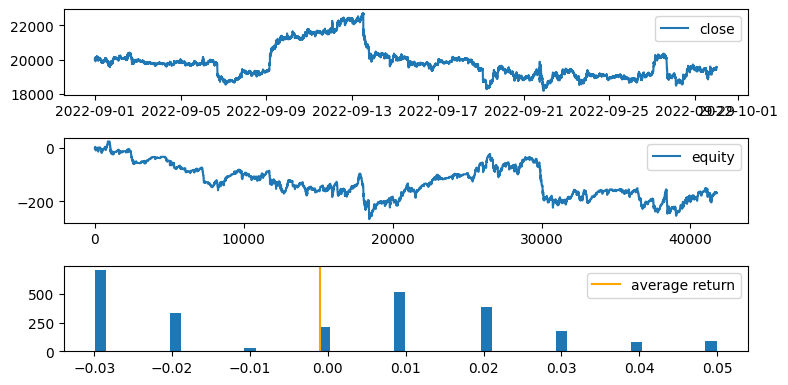

In [17]:
tempre(
    symbol="BTCUSD", # default=BTCUSD
    sqlite_file_name="backtest.sqlite3", # (default=backtest.sqlite3)
    from_date="2022-09-01",
    to_date="2022-09-30",
    interval="1T", # 5-60S(second), 1-60T(minute), 1-24H(hour) (default=1T)
    download_data_dir="data", # download data directory (default=data)
).run("backtest.png")